[[[0.78823529 0.8        0.77254902]
  [0.78823529 0.8        0.77254902]
  [0.78823529 0.8        0.77254902]
  ...
  [0.76862745 0.75686275 0.70588235]
  [0.76862745 0.75686275 0.70588235]
  [0.76862745 0.75686275 0.70588235]]

 [[0.78823529 0.8        0.77254902]
  [0.78823529 0.8        0.77254902]
  [0.78823529 0.8        0.77254902]
  ...
  [0.76862745 0.75686275 0.70588235]
  [0.76862745 0.75686275 0.70588235]
  [0.76862745 0.75686275 0.70588235]]

 [[0.78823529 0.8        0.77254902]
  [0.78823529 0.8        0.77254902]
  [0.78823529 0.8        0.77254902]
  ...
  [0.76862745 0.75686275 0.70588235]
  [0.76862745 0.75686275 0.70588235]
  [0.76862745 0.75686275 0.70588235]]

 ...

 [[0.74117647 0.76470588 0.83137255]
  [0.72156863 0.74509804 0.81176471]
  [0.68627451 0.70980392 0.77647059]
  ...
  [0.52156863 0.50588235 0.58039216]
  [0.54117647 0.5254902  0.59607843]
  [0.54901961 0.53333333 0.60784314]]

 [[0.73333333 0.75294118 0.82352941]
  [0.70980392 0.72941176 0.8       ]


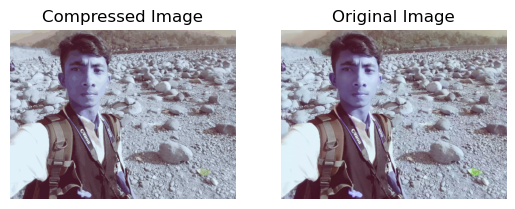

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

from skimage import io
#import mahotas as mh
import cv2

original_img = np.array(cv2.imread('./data/we.jpg'), dtype=np.float64) / 255
# img = cv2.imread('IMG_0559-01.jpeg')
print(original_img)


original_dimensions = tuple(original_img.shape)
width, height, depth = tuple(original_img.shape)
image_flattened = np.reshape(original_img, (width * height, depth))

image_array_sample = shuffle(image_flattened, random_state=0)[:1000]
estimator = KMeans(n_clusters=64, random_state=0)
estimator.fit(image_array_sample)
cluster_assignments = estimator.predict(image_flattened)

compressed_palette = estimator.cluster_centers_
compressed_img = np.zeros((width, height, compressed_palette.
shape[1]))
label_idx = 0
for i in range(width):
    for j in range(height):
        compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
        label_idx += 1


plt.subplot(122)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')
plt.subplot(121)
plt.title('Compressed Image')
plt.imshow(compressed_img)
plt.axis('off')
plt.show()